In [6]:
import epics
import numpy as np
from PIL import Image

In [2]:
# testing EPICS with the monochromator
epics.caget('bl531_xps1:mono_angle_deg')

CA.Client.Exception...............................................
    Context: "Channel: "bl531_xps1:mono_angle_deg", Connecting to: 131.243.80.239:5064, Ignored: 192.168.10.123:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Mon Apr 22 2024 17:52:17.779838292
..................................................................


25.8

In [4]:

epics.caget('bl201-beamstop:current')

CA.Client.Exception...............................................
    Context: "Channel: "bl201-beamstop:current", Connecting to: 131.243.80.239:39163, Ignored: 192.168.10.123:39163"
    Source File: ../cac.cpp line 1320
    Current Time: Mon Apr 22 2024 17:52:43.506558663
..................................................................


-122.83

In [18]:
import matplotlib.pyplot as plt
from time import sleep as time_sleep

mono_angles_deg = np.linspace(25,26,101)
pd_val_nA = mono_angles_deg*0


epics.caput('bl531_xps1:mono_angle_deg', mono_angles_deg[0])
time_sleep(5)
for i_a in np.arange(len(mono_angles_deg)):
    epics.caput('bl531_xps1:mono_angle_deg', mono_angles_deg[i_a])
    time_sleep(0.5)
    pd_val_nA[i_a] = epics.caget('bl201-beamstop:current')




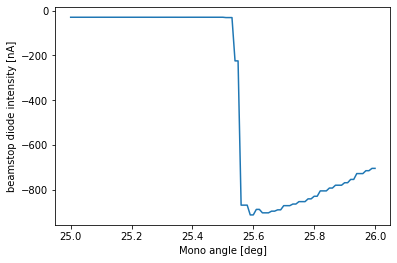

In [19]:
plt.plot(mono_angles_deg,pd_val_nA)
plt.xlabel('Mono angle [deg]')
plt.ylabel('beamstop diode intensity [nA]')
plt.show()


In [17]:
pd_val_nA

array([  -29.85,   -29.85,   -29.85,   -29.85,   -29.85,   -29.85,
         -29.85,   -29.85,   -29.85,   -29.85,   -29.85,   -29.85,
         -29.85,   -29.85,   -29.85,   -29.85,   -29.85,   -29.85,
         -29.85,   -29.85,   -29.85,   -29.85,   -29.81,   -29.81,
         -29.81,   -29.81,   -29.81,   -29.81,   -29.81,   -29.81,
         -29.81,   -29.81,   -29.81,   -29.81,   -29.8 ,   -29.8 ,
         -29.8 ,   -29.8 ,   -29.8 ,   -29.8 ,   -29.8 ,   -29.8 ,
         -29.8 ,   -29.8 ,   -29.8 ,   -29.8 ,   -29.78,   -29.78,
         -29.78,   -29.78,   -29.78,   -29.78,   -29.78,   -29.78,
         -29.78,   -29.78,   -29.78,   -29.78,   -29.81,   -29.81,
         -29.81,   -29.81,   -29.81,   -29.81,   -29.81,   -29.81,
         -29.81,   -29.81,   -29.81,   -29.81, -1204.  , -1204.  ,
       -1204.  , -1204.  , -1204.  , -1204.  , -1204.  , -1204.  ,
       -1204.  , -1204.  , -1204.  ,  -835.7 ,  -835.7 ,  -835.7 ,
        -835.7 ,  -835.7 ,  -835.7 ,  -835.7 ,  -835.7 ,  -835

# DO NOT OPERATE WHAT IS BELOW

In [ ]:
from bluesky import RunEngine
RE = RunEngine({})

from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

In [ ]:
from ophyd import EpicsMotor
import ophyd
ophyd.set_cl('caproto')

#that does not work
#det = ophyd.EpicsMotor('BL531:PS:POS_0', name='picoscale') 
#det.read()

bl531_current = ophyd.EpicsSignal('bl201-beamstop:current', name='picoammeter')
# do not do a read in the same cell! too fast

#this works
bl531_current.wait_for_connection(timeout=2.0)
bl531_current.read()

In [ ]:
#worked at some point... needs to be launched
bl531_mono = EpicsMotor('IOC:m1', name='Mono theta')
#mono_theta = EpicsMotor('IOC:m1', name='theta')
bl531_mono.wait_for_connection(timeout=2.0)
bl531_mono.read()

In [ ]:
from bluesky.plans import count
#dets = [det1, det2]   # a list of any number of detectors

dets = [bl531_current]   # a list of any number of detectors
motors = bl531_mono 

RE(count(dets))

In [ ]:
from bluesky.plans import scan
RE(scan(dets, motors, 20, 21, 2))

In [ ]:
header = db[-1]
header.table()